In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

In [3]:
!mkdir data
!tar -xf inno_stats.tar.gz -C ./data

mkdir: cannot create directory ‘data’: File exists


In [4]:
data_path = Path('./data/').resolve()
!ls {data_path}

 09_groups.csv	       11_prepared.pkl.bz2	    inno_stats.tar.gz
 09_prepared.pkl.bz2   11_stats.pkl.bz2		    product_groups.csv
 09_stats.pkl.bz2     'bad_ids - bad_ids.csv.csv'   product_groups.txt
 10_groups.csv	       bad_ids.pkl		    products_20200901.csv
 10_prepared.pkl.bz2   bad_ids.pkl.bz2		    products_20200901.txt
 10_stats.pkl.bz2      card_lbe.pkl.bz2		    products_20201101.txt
 11_groups.csv	       doc_lbe.pkl.bz2		    product_sum_20201001.txt


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [6]:
g_10 = pd.read_csv('./data/10_groups.csv')
g_10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-10-01 20:22:55,2035558,0.0,1636749,52,339,1.0,107.90,0,10004
1,2020-10-01 20:54:12,13037327,0.0,267261,52,339,1.0,80.04,0,10004
2,2020-10-01 21:25:59,1430590,0.0,1331395,61,379,1.0,31.92,1,10091
3,2020-10-01 13:31:01,3504660,0.0,641525,61,97,1.0,55.98,0,10091
4,2020-10-01 16:32:06,11024438,0.0,1325852,61,97,4.0,176.00,0,10091


In [7]:
g_11 = pd.read_csv('./data/11_groups.csv')
g_11.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-11-01 15:29:01,3121751,0.0,332351,52,271,1.0,107.98,0,10004
1,2020-11-01 12:41:10,22047017,8293317.0,1875438,52,-9999,1.0,108.00,0,10004
2,2020-11-01 13:17:09,6419825,0.0,563112,61,379,2.0,112.00,0,10091
3,2020-11-01 12:31:31,10284541,0.0,1841710,61,379,1.0,55.91,0,10091
4,2020-11-01 13:06:15,10424967,0.0,1304277,61,271,2.0,87.80,0,10091


In [8]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


## Preprocessing

In [9]:
g_all = pd.concat([g_9, g_10, g_11])

In [10]:
del g_9, g_10, g_11

In [17]:
bad_ids = list(pd.read_csv('data/bad_ids - bad_ids.csv.csv', index_col=0).id_card)

In [26]:
g_all = g_all[~g_all.id_card.isin(bad_ids)]

In [27]:
g_all.to_csv('./data/all_groups.csv', index=False)

## Restart to clean used memory

In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

In [2]:
g_all = pd.read_csv('./data/all_groups.csv')

In [3]:
g_all

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091
...,...,...,...,...,...,...,...,...,...,...
122718349,2020-11-30 13:48:32,21118161,0.0,406658,20851,13532,1.0,29.00,0,10033
122718350,2020-11-30 15:05:50,13726324,0.0,1423663,21420,12831,1.0,81.00,0,10103
122718351,2020-11-30 13:49:02,17134146,0.0,406658,22397,12657,1.0,76.00,0,10005
122718352,2020-11-30 14:44:37,3130473,0.0,1319934,22932,13532,1.0,34.00,0,10033


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

To begin with, it's not completely clear why we are talking about average order sum in the first sentence, and `a bunch of money` (e.g. total sum) in the second. As considering average order sum (between several items ??) doesn't make much sense i will check that if **total money spent**. Then when we are talking about *more probable that the discounted product will be bought*  we are considering the % of the green items within a cart.

Our $H_0$ is therefore:

$H_0$: There is no dependence between **total money spent in the order** and **percentage of green in the order**

$H_a$: There is some dependece (our task to see if it's positive, but we will see)

In [29]:
from scipy.stats import pearsonr, spearmanr
import numpy as np

In [30]:
total_spent = g_all[['sum', 'id_doc']].groupby("id_doc").sum()['sum'].to_list()

total_discounts = g_all[['id_doc', 'is_green']].groupby("id_doc")['is_green'].sum().to_list()
order_n = g_all[['sum', 'id_doc']].groupby("id_doc").count()['sum'].to_list()

discount_percent = (np.array(total_discounts)/np.array(order_n))

To check dependence we compute pearson correlation with p value.

Note: function returns tuple of (pearson_correlation, p-value)

In [32]:
pearsonr(total_spent, discount_percent)

(-0.12195465420086782, 0.0)

We can also consider spearman coefficient, which doesn't assume normally distributed data for the same (almost) result

In [34]:
res = spearmanr(total_spent, discount_percent)
res

SpearmanrResult(correlation=-0.04744200738400495, pvalue=0.0)

As there are a lot of items, the p-value for $H_0$ is so small that it turned into 0. Therefore we can reject the null hypothesis and see that it's actually means that the **more money is spent** the **there is less probability of items with discount** in the order.

Therefore we has shown that there dependece, although an inverse one.

## Task 2
Prove that the frequency of shopping grows around the wage taking days (1-6 days of each month, 20-26 days of each month)

In [4]:
from matplotlib import pyplot as plt

In [5]:
g_all

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091
...,...,...,...,...,...,...,...,...,...,...
122718349,2020-11-30 13:48:32,21118161,0.0,406658,20851,13532,1.0,29.00,0,10033
122718350,2020-11-30 15:05:50,13726324,0.0,1423663,21420,12831,1.0,81.00,0,10103
122718351,2020-11-30 13:49:02,17134146,0.0,406658,22397,12657,1.0,76.00,0,10005
122718352,2020-11-30 14:44:37,3130473,0.0,1319934,22932,13532,1.0,34.00,0,10033


In [6]:
g_all['date'] = pd.to_datetime(g_all['date'],format='%Y-%m-%d %H:%M:%S')
g_all['day'] = g_all.date.dt.day
g_all['month'] = g_all.date.dt.month

We only need a day and number of orders

In [46]:
orders_per_day = g_all[['date', 'day', 'month', 'id_doc']].copy()
orders_per_day = orders_per_day.drop_duplicates(keep='first')

In [63]:
orders_day_count = orders_per_day.groupby('day')['id_doc'].count().to_frame()

In [64]:
orders_day_count.loc[orders_day_count.index < 31, 'id_doc'] = (orders_day_count[orders_day_count.index < 31].id_doc/3)

In [65]:
orders_day_count

,id_doc
day,
1,227555.333333
2,243523.000000
3,228288.333333
4,212393.666667
5,222405.333333
6,226417.333333
7,233806.333333
8,216698.000000
9,237230.000000


Looking at the graph we don't see any increase during 1-6 and 20-26 days period, but here is an obvious weekly seasonality present

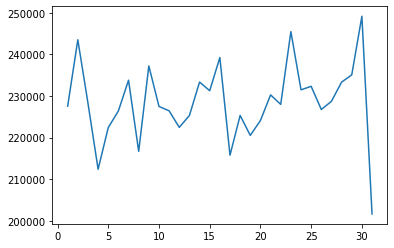

In [66]:
plt.plot(orders_day_count.index,orders_day_count.id_doc)
plt.show()

In [67]:
orders_day_count

,id_doc
day,
1,227555.333333
2,243523.000000
3,228288.333333
4,212393.666667
5,222405.333333
6,226417.333333
7,233806.333333
8,216698.000000
9,237230.000000


Let's compute one way ANOVA between wage days and other days.

$H_0$: Frequency of shopping in group of `after-wage` days is the same as in all other days

$H_a$: The frequency is different

In [68]:
all_days = orders_day_count.id_doc.to_list()
wage_days = all_days[0:6]+all_days[19:26] # from 1-6 and from 20 to 26
others = all_days[6:18] + all_days[25:]
len(wage_days), len(others), len(all_days)

(13, 18, 31)

In [69]:
from scipy.stats import f_oneway

In [70]:
f_oneway(others, wage_days)

F_onewayResult(statistic=0.06103499215526691, pvalue=0.8066081455706866)

As the p-value is quite high, we can't reject the null hypothesis. Therefore we should suggest that there is no difference between wage days and other days, meaning that the frequency of shopping doesn't depend on it.

Next follows the leftovers from the seasonal decomposion, but it shows that there is another seasonality - weeks

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
orders_day_count = orders_per_day.groupby(['month', 'day'])['id_doc'].count()

In [77]:
orders_day_count

,month,day,id_doc
0,9,1,240615
1,9,2,243419
2,9,3,245866
3,9,4,235497
4,9,5,178832
...,...,...,...
86,11,26,245163
87,11,27,241850
88,11,28,203307
89,11,29,200861


In [78]:
orders_day_count = orders_day_count.reset_index()

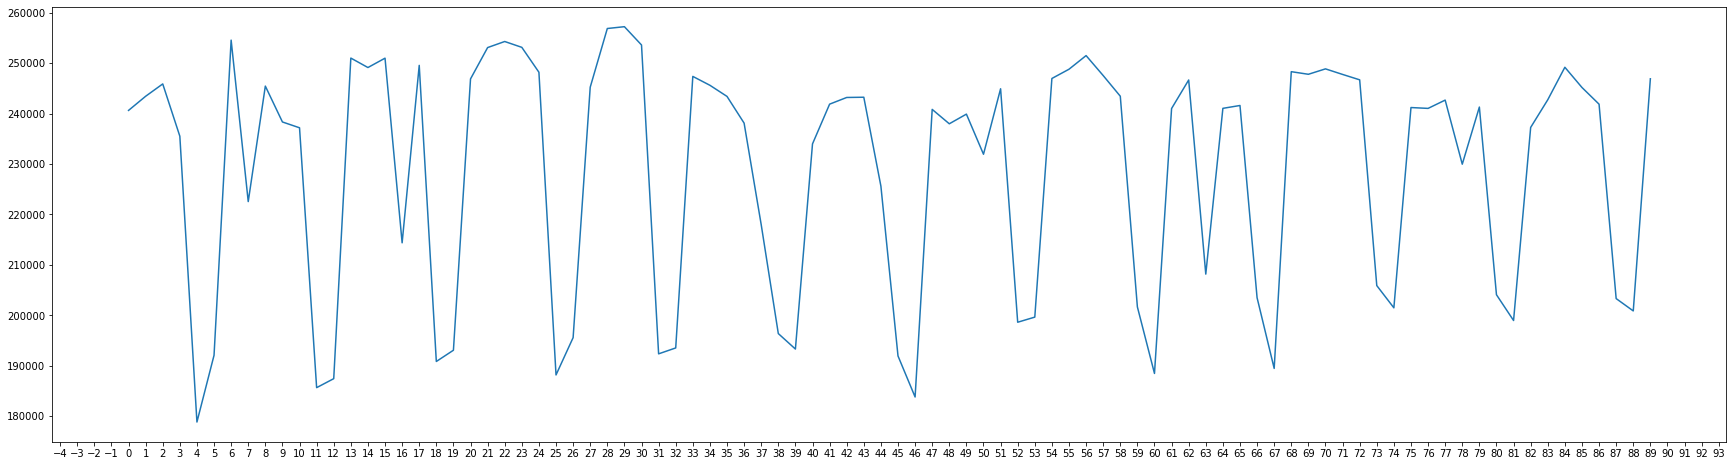

In [79]:
plt.figure(figsize=(30,8))
plt.locator_params(axis="x", nbins=180)
plt.plot(orders_day_count.index,orders_day_count.id_doc)
plt.show()

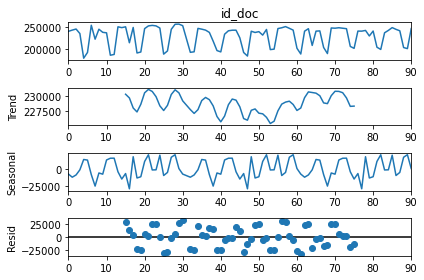

In [45]:
result = seasonal_decompose(orders_day_count['id_doc'], model='additive', period=30)
result.plot()
plt.show()

In [84]:
orders_per_day = g_all[['date', 'day', 'month', 'id_doc']].copy()
orders_per_day = orders_per_day.drop_duplicates(keep='first')
orders_per_day

,date,day,month,id_doc
0,2020-09-01 17:01:25,1,9,1283228
1,2020-09-01 17:35:36,1,9,8873113
2,2020-09-01 19:19:21,1,9,12712899
3,2020-09-01 21:53:34,1,9,21535283
4,2020-09-01 18:42:31,1,9,642341
...,...,...,...,...
122718347,2020-11-30 15:26:38,30,11,9357992
122718348,2020-11-30 10:48:26,30,11,9567098
122718350,2020-11-30 15:05:50,30,11,13726324
122718351,2020-11-30 13:49:02,30,11,17134146


In [99]:
orders_per_day['day_of_week'] = orders_per_day.date.dt.dayofweek

In [102]:
day_of_week_counts = orders_per_day.groupby('day_of_week')['day'].count().to_list()

In [103]:
day_of_week_counts

[3181312, 3174563, 3178096, 3129928, 3119848, 2541161, 2517603]

In [107]:
f_oneway(day_of_week_counts[:5], day_of_week_counts[5:])

F_onewayResult(statistic=752.7232173570374, pvalue=1.2037979906773548e-06)

This shows that there is indeed a difference between frequencies between groups of Monday-Friday and Saturday-Sunday

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

To define cohort we need to check if there exists a group of users with common properties

### Frequent buyers

Here I will check the customers that buy at least once per day, per week and per month

In [4]:
g_all['date'] = pd.to_datetime(g_all['date'],format='%Y-%m-%d %H:%M:%S')

In [5]:
g_all['day'] = g_all.date.dt.day
g_all['month'] = g_all.date.dt.month

In [6]:
g_all

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group,day,month
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004,1,9
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004,1,9
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004,1,9
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004,1,9
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
122718349,2020-11-30 13:48:32,21118161,0.0,406658,20851,13532,1.0,29.00,0,10033,30,11
122718350,2020-11-30 15:05:50,13726324,0.0,1423663,21420,12831,1.0,81.00,0,10103,30,11
122718351,2020-11-30 13:49:02,17134146,0.0,406658,22397,12657,1.0,76.00,0,10005,30,11
122718352,2020-11-30 14:44:37,3130473,0.0,1319934,22932,13532,1.0,34.00,0,10033,30,11


In [17]:
relevant_info = g_all[['date', 'id_doc', 'id_card', 'day', 'month']].drop_duplicates(keep='first')

In [27]:
relevant_info['week'] = relevant_info.date.dt.week

/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [43]:
relevant_info

,date,id_doc,id_card,day,month,week
0,2020-09-01 17:01:25,1283228,1538855,1,9,36
1,2020-09-01 17:35:36,8873113,267307,1,9,36
2,2020-09-01 19:19:21,12712899,610220,1,9,36
3,2020-09-01 21:53:34,21535283,441497,1,9,36
4,2020-09-01 18:42:31,642341,1065358,1,9,36
...,...,...,...,...,...,...
122718347,2020-11-30 15:26:38,9357992,538217,30,11,49
122718348,2020-11-30 10:48:26,9567098,1885473,30,11,49
122718350,2020-11-30 15:05:50,13726324,1423663,30,11,49
122718351,2020-11-30 13:49:02,17134146,406658,30,11,49


#### Per day

In [48]:
user_buy_day = g_all[['id_card', 'day', 'month']].drop_duplicates(keep='first')

In [49]:
user_buy_day

,id_card,day,month
0,1538855,1,9
1,267307,1,9
2,610220,1,9
3,441497,1,9
4,1065358,1,9
...,...,...,...
122718345,406658,30,11
122718346,1319934,30,11
122718347,538217,30,11
122718350,1423663,30,11


Get amount of days where user has bought something

In [13]:
user_day_count = user_buy_day.groupby('id_card').count()

In [19]:
user_day_count = user_day_count.reset_index().drop(columns='month')
user_day_count['day'] = user_day_count.day/90

It seems like noone has bought anything `every` day during the 3 month period. We can also check for separate months

In [29]:
user_day_count[user_day_count.day > 0.8]

,id_card,day
165454,168618,0.811111
213002,216986,0.811111
358752,364969,0.811111
541398,550152,0.811111
560417,569448,0.811111
751685,763192,0.811111
871787,884692,0.811111
1011316,1026141,0.811111
1290164,1308754,0.811111
1436052,1456677,0.811111


In [31]:
us_count_sept = (user_buy_day[user_buy_day.month==9].groupby('id_card').count().reset_index().day/30).to_frame()

In september, october and november there were those who came daily or almost daily, the threshold may be define for the type of cohort one may need

In [38]:
us_count_sept[us_count_sept.day == 1.0]

,day
18366,1.0
30170,1.0
55502,1.0
88143,1.0
159080,1.0
198708,1.0
273779,1.0
332179,1.0
349716,1.0
380519,1.0


In [34]:
us_count_oct = (user_buy_day[user_buy_day.month==10].groupby('id_card').count().reset_index().day/31).to_frame()

In [39]:
us_count_oct[us_count_oct.day == 1.0]

,day
266526,1.0
336323,1.0
368369,1.0
830210,1.0
877953,1.0
879067,1.0
1015225,1.0
1045489,1.0


In [35]:
us_count_nov = (user_buy_day[user_buy_day.month==11].groupby('id_card').count().reset_index().day/30).to_frame()

In [40]:
us_count_nov[us_count_nov.day == 1.0]

,day
18366,1.0
30170,1.0
55502,1.0
88143,1.0
159080,1.0
198708,1.0
273779,1.0
332179,1.0
349716,1.0
380519,1.0


### Weekly

Users who buy at least once per week

In [50]:
user_buy_week = relevant_info[['id_card', 'week']].drop_duplicates(keep='first')

In [73]:
user_buy_week_count = user_buy_week.groupby('id_card').count()
user_buy_week_count = user_buy_week_count.reset_index()
user_buy_week_count['week'] = user_buy_week_count.week/relevant_info.week.nunique()
user_buy_week_count[user_buy_week_count.week == 1.0]

,id_card,week,id_doc
5,5,1.0,14
16,16,1.0,14
70,85,1.0,14
98,127,1.0,14
110,143,1.0,14
...,...,...,...
1911923,1936625,1.0,14
1912028,1936730,1.0,14
1914079,1938783,1.0,14
1914169,1938873,1.0,14


Maybe only once per week every week?

In [54]:
user_buy_week = relevant_info[['id_card', 'week', 'id_doc']].drop_duplicates(keep='first')

In [83]:
user_buy_week_count = user_buy_week.groupby(['id_card', 'week']).count()
user_buy_week_count = user_buy_week_count.reset_index()
user_buy_week_count = user_buy_week_count[user_buy_week_count.id_doc == 1] # only once

In [84]:
user_buy_week_count = user_buy_week_count.groupby('id_card').count()
user_buy_week_count['week'] = user_buy_week_count.week/relevant_info.week.nunique()
user_buy_week_count[user_buy_week_count.week == 1.0]

,week,id_doc
id_card,,
58253,1.0,14
179640,1.0,14
428149,1.0,14
472661,1.0,14
597323,1.0,14
1539800,1.0,14
1554263,1.0,14


### Monthly

Users who buy at least once per month

In [86]:
user_buy_month = relevant_info[['id_card', 'month']].drop_duplicates(keep='first')

In [89]:
user_buy_month_count = user_buy_month.groupby('id_card').count()
user_buy_month_count = user_buy_month_count.reset_index()
user_buy_month_count['month'] = user_buy_month_count.month/relevant_info.month.nunique()
user_buy_month_count[user_buy_month_count.month == 1.0]

,id_card,month
3,3,1.0
4,4,1.0
9,9,1.0
10,10,1.0
11,11,1.0
...,...,...
1908026,1932721,1.0
1908028,1932723,1.0
1908688,1933385,1.0
1914713,1939417,1.0


Maybe only once per week every week?

In [95]:
user_buy_month = relevant_info[['id_card', 'month', 'id_doc']].drop_duplicates(keep='first')

In [96]:
user_buy_month_count = user_buy_month.groupby(['id_card', 'month']).count()
user_buy_month_count = user_buy_month_count.reset_index()
user_buy_month_count = user_buy_month_count[user_buy_month_count.id_doc == 1] # only once

In [97]:
user_buy_month_count = user_buy_month_count.groupby('id_card').count()
user_buy_month_count['month'] = user_buy_month_count.month/relevant_info.month.nunique()
user_buy_month_count[user_buy_month_count.month == 1.0]

,month,id_doc
id_card,,
225,1.0,3
323,1.0,3
397,1.0,3
416,1.0,3
613,1.0,3
...,...,...
1932415,1.0,3
1932514,1.0,3
1932636,1.0,3


### Average purchase sum

In [173]:
g_all

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group,day,month
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004,1,9
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004,1,9
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004,1,9
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004,1,9
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
122718349,2020-11-30 13:48:32,21118161,0.0,406658,20851,13532,1.0,29.00,0,10033,30,11
122718350,2020-11-30 15:05:50,13726324,0.0,1423663,21420,12831,1.0,81.00,0,10103,30,11
122718351,2020-11-30 13:49:02,17134146,0.0,406658,22397,12657,1.0,76.00,0,10005,30,11
122718352,2020-11-30 14:44:37,3130473,0.0,1319934,22932,13532,1.0,34.00,0,10033,30,11


Get the sum customer spent on each order

In [257]:
avg_spent_on_cart = g_all.groupby(['id_doc', 'id_card']).agg(order_sum=('sum', 'sum'))

In [258]:
avg_spent_on_cart = avg_spent_on_cart.reset_index()
avg_spent_on_cart

,id_doc,id_card,order_sum
0,0,457312,274.00
1,1,50796,790.00
2,2,1425208,396.00
3,3,1164741,228.00
4,4,1438933,1597.00
...,...,...,...
20842506,23417863,1341722,427.00
20842507,23417864,1392399,324.00
20842508,23417866,1935942,935.00
20842509,23417867,1587296,838.24


Let's compute variance of spendings for each user (id card). We also consider more frequent buyers (they have at 10 purcahses) to make the cohort more representable

In [266]:
std_spendings = (avg_spent_on_cart
                 .groupby('id_card')
                 .agg(purchases_count=('id_doc', 'count'), purchase_std=('order_sum', 'std'))
                )

In [267]:
std_spendings

,purchases_count,purchase_std
id_card,,
0,10,217.845882
1,2,31.819805
2,1,NaN
3,17,247.947245
4,13,360.432977
...,...,...
1944071,1,NaN
1944072,1,NaN
1944073,1,NaN


NaN because of 1 purchases... Let's clear them

In [270]:
std_spendings = std_spendings[std_spendings.purchases_count >= 10]

We now need to define the minimal std for people to be included to the cohort. We can consider that +-150 rubles is roughly the same amount. So let's take $3\sigma$ will be the upper boundary of the deviation, and we get 50 rub as a boundary.

<AxesSubplot:>

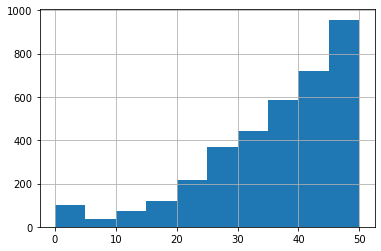

In [295]:
std_spendings[std_spendings.purchase_std < 50]['purchase_std'].hist()

In [296]:
std_spendings[std_spendings.purchase_std < 50]

,purchases_count,purchase_std
id_card,,
527,18,46.080291
1274,11,42.859976
1570,17,46.113509
1676,20,47.297602
1751,10,44.802253
...,...,...
1929004,12,38.307438
1930076,20,49.192720
1932381,15,42.296347


Let's check a card

In [297]:
avg_spent_on_cart[avg_spent_on_cart.id_card==527]

,id_doc,id_card,order_sum
636634,715190,527,119.00
4564147,5126811,527,119.00
4743249,5327818,527,119.00
5935925,6667482,527,52.56
6011152,6751808,527,190.00
6438690,7232012,527,215.00
10585721,11891648,527,119.00
10776830,12106559,527,119.00
11684727,13126084,527,119.00
11895389,13362827,527,119.00


This user usually buys for around 119. This is what we wanted to get.

### Customers that usually buy the same things (same categories)

In [4]:
g_all

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091
...,...,...,...,...,...,...,...,...,...,...
122718349,2020-11-30 13:48:32,21118161,0.0,406658,20851,13532,1.0,29.00,0,10033
122718350,2020-11-30 15:05:50,13726324,0.0,1423663,21420,12831,1.0,81.00,0,10103
122718351,2020-11-30 13:49:02,17134146,0.0,406658,22397,12657,1.0,76.00,0,10005
122718352,2020-11-30 14:44:37,3130473,0.0,1319934,22932,13532,1.0,34.00,0,10033


To see if there is a cohort of customers buying (usually) the same thing every time I will check the amount of orders where the customer has bought every id_group and divide it by the total amount of orders. This will show the percent of occurence of said item group in the order of the customer.

We will then take the mean throughout the whole items and see if customer usually buys the things using some threshold.

Remove unknown groups

In [14]:
df = g_all[g_all.id_group != -9999]

In [5]:
total_amount_purchases = g_all.groupby(['id_card', 'id_group', 'id_doc'])['id_tov'].count()

In [13]:
total_amount_purchases.to_frame().reset_index()

,id_card,id_group,id_doc,id_tov
0,0,10004,13712620,1
1,0,10008,16637277,1
2,0,10017,19997756,1
3,0,10030,60540,1
4,0,10032,4304074,2
...,...,...,...,...
97292975,1944074,10155,17565622,1
97292976,1944074,10162,2746927,1
97292977,1944074,10180,17565622,1
97292978,1944074,10192,3502007,1


In [19]:
count_of_products_per_card = total_amount_purchases.to_frame().reset_index().groupby(['id_card', 'id_group'])['id_doc'].count().to_frame()

In [20]:
count_of_products_per_card

id_doc
id_card id_group        
0        10004         1
         10008         1
         10017         1
         10030         1
         10032         6
...                  ...
1944074  10155         3
         10162         1
         10180         1
         10192         1
1944075 -9999          1

[30461801 rows x 1 columns]

This is number of orders

In [30]:
orders = g_all[['id_card', 'id_doc']].drop_duplicates(keep='first').groupby('id_card').count().reset_index()
orders

,id_doc
id_card,
0,10
1,2
2,1
3,17
4,13
...,...
1944071,1
1944072,1
1944073,1


In [39]:
count_of_products_per_card

,id_card,id_group,id_doc
0,0,10004,1
1,0,10008,1
2,0,10017,1
3,0,10030,1
4,0,10032,6
...,...,...,...
30461796,1944074,10155,3
30461797,1944074,10162,1
30461798,1944074,10180,1
30461799,1944074,10192,1


Let's again consider only users with more then 10 orders

In [54]:
orders['total_count'] = orders['id_doc']
orders = orders.drop(columns='id_doc')
orders = orders[orders.total_count >= 10]

In [55]:
orders 

,id_card,total_count
0,0,10
3,3,17
4,4,13
5,5,14
10,10,24
...,...,...
1916708,1941412,10
1917304,1942009,11
1917586,1942291,16
1917643,1942348,15


In [62]:
df_merge = pd.merge(
    count_of_products_per_card,
    orders,
    how="left",
    on='id_card',
    sort=False,
    suffixes=("_first", "_second"),
    copy=False,
).dropna()

In [63]:
df_merge

,id_card,id_group,id_doc,total_count
0,0,10004,1,10.0
1,0,10008,1,10.0
2,0,10017,1,10.0
3,0,10030,1,10.0
4,0,10032,6,10.0
...,...,...,...,...
30461795,1944074,10127,2,12.0
30461796,1944074,10155,3,12.0
30461797,1944074,10162,1,12.0
30461798,1944074,10180,1,12.0


In [64]:
df_merge['perc'] = df_merge['id_doc']/df_merge['total_count']

In [80]:
avg_percent_per_card = df_merge.groupby('id_card')['perc'].mean().to_frame()

In [86]:
avg_percent_per_card

,perc
id_card,
0,0.222222
3,0.155882
4,0.230769
5,0.182143
10,0.207483
...,...
1941412,0.190476
1942009,0.515152
1942291,0.125000


In [84]:
avg_percent_per_card[avg_percent_per_card.perc == 1]

,perc
id_card,
3938,1.0
12437,1.0
32975,1.0
39055,1.0
60008,1.0
...,...
1900389,1.0
1903847,1.0
1904864,1.0


This is exactly what we needed, this customer buys the same product every time.

In [85]:
g_all[g_all.id_card==3938].groupby(['id_doc', 'id_group'])['date'].count().to_frame()

,,date
id_doc,id_group,
2363870,10098,1
2375189,10098,1
2641694,10098,1
4034768,10098,1
4425976,10098,1
5423534,10098,1
7589416,10098,1
11608645,10098,1
13749027,10098,1


We now need to consider a threshold. It may be 75%, meaning that 75% of item throughout all of the customers purchases were of the same product group, which is quite small amount of people

array([[<AxesSubplot:title={'center':'perc'}>]], dtype=object)

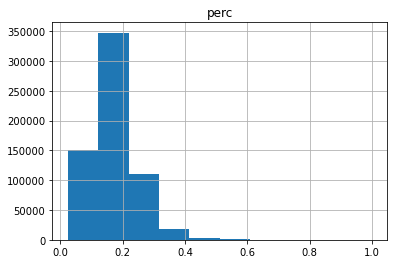

In [89]:
avg_percent_per_card.hist()

In [96]:
avg_percent_per_card[avg_percent_per_card.perc >= 0.75]

,perc
id_card,
3938,1.000000
10496,0.897436
12437,1.000000
24925,0.772727
30252,0.916667
...,...
1921674,1.000000
1925711,0.886364
1928088,0.766667
